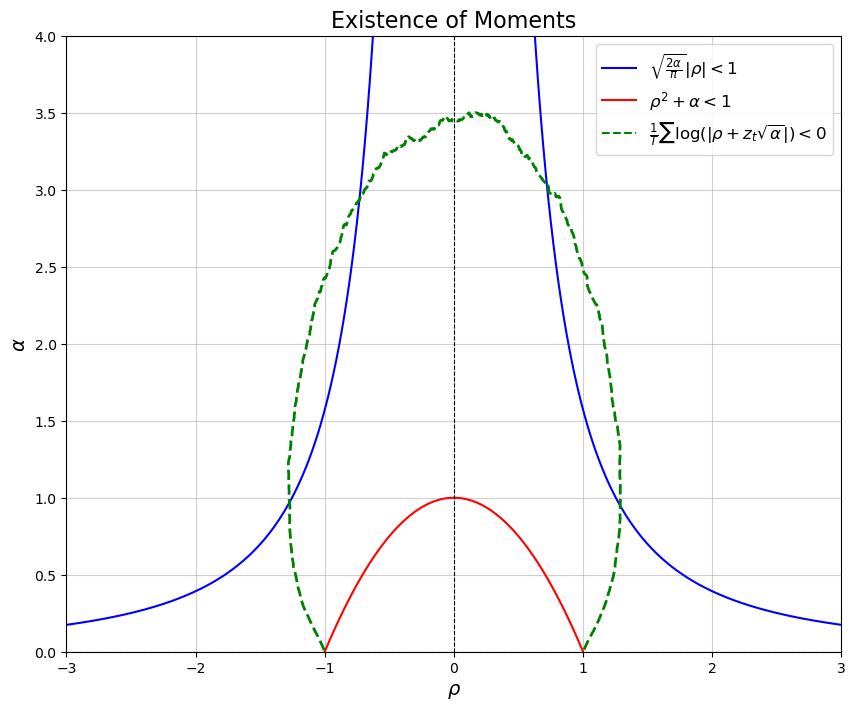

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
pi = np.pi
T = 10000  # Number of samples
z_samples = np.random.normal(0, 1, T)  # Draw T samples from N(0, 1)

# Define ranges for rho and alpha
rho_vals = np.linspace(-1.5, 1.5, 500)
alpha_vals = np.linspace(0.01, 5, 500)  # Avoid alpha = 0 for stability

# Grid to evaluate the condition
Rho, Alpha = np.meshgrid(rho_vals, alpha_vals)

# Compute the average log for the condition
log_condition = np.zeros_like(Rho)
for i in range(Rho.shape[0]):  # For each alpha
    for j in range(Rho.shape[1]):  # For each rho
        rho = Rho[i, j]
        alpha = Alpha[i, j]
        log_terms = np.log(np.abs(rho + z_samples * np.sqrt(alpha)))
        log_condition[i, j] = np.mean(log_terms)

# Determine the boundary where the condition transitions from < 0 to >= 0
contour_levels = [0]  # We are interested in the zero-level line

# Plot the previous lines
plt.figure(figsize=(10, 8))

# Curve: sqrt(2alpha/pi) * |rho| = 1
rho_curve = np.linspace(-10, 10, 1000)
rho_curve = rho_curve[rho_curve != 0]
alpha_curve1 = (pi / 2) / (rho_curve**2)
plt.plot(rho_curve, alpha_curve1, label=r'$\sqrt{\frac{2\alpha}{\pi}} |\rho| < 1$', color='blue')

# Curve: ρ^2 + α = 1
rho_curve2 = np.linspace(-1, 1, 500)
alpha_curve2 = 1 - rho_curve2**2
plt.plot(rho_curve2, alpha_curve2, label=r'$\rho^2 + \alpha < 1$', color='red')

# Contour: 1/T ∑ log(|ρ + z_t √α|) < 0
contour = plt.contour(Rho, Alpha, log_condition, levels=contour_levels, colors='green', linewidths=2, linestyles='--')
# Add a dummy plot to include "Condition 3" in the legend
plt.plot([], [], color='green', linestyle='--', label=r'$\frac{1}{T}\sum\log(|\rho + z_t \sqrt{\alpha}|) < 0$')

# Labels and legend
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Alpha axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Rho axis
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)
plt.title(r'Existence of Moments', fontsize=16)

plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.6)
plt.ylim(0, 4)
plt.xlim(-3, 3)

# Show the plot
plt.show()


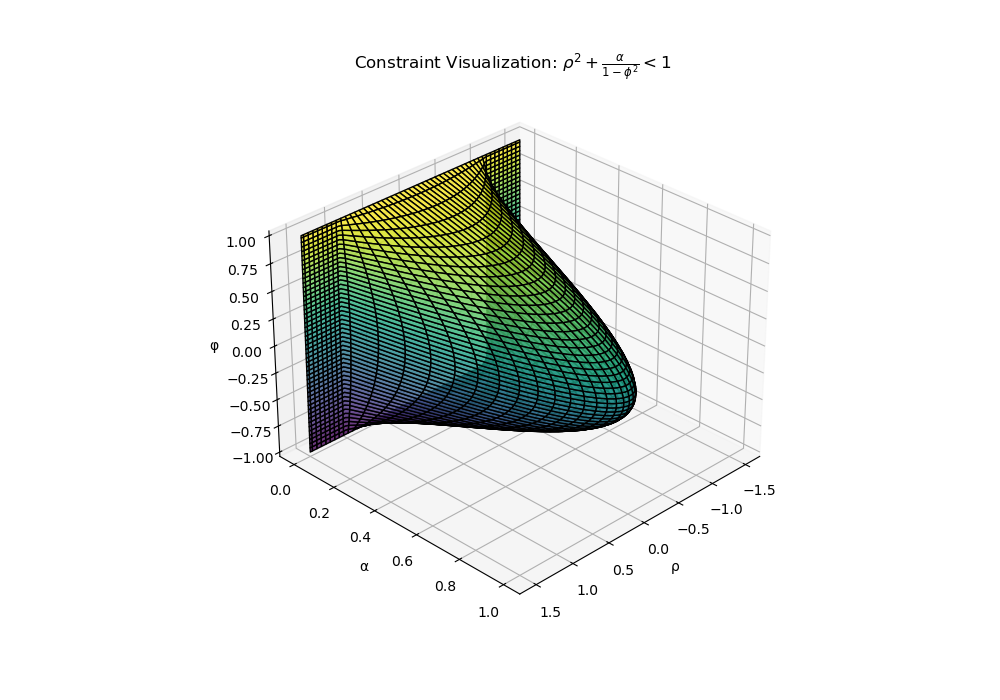

In [8]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for the variables
rho = np.linspace(-1.5, 1.5, 100)  # ρ values between -2 and 2
phi = np.linspace(-1, 1, 100)  # φ values between -2 and 2
rho, phi = np.meshgrid(rho, phi)

# Compute α based on the constraint ρ^2 + α / (1 - φ^2) = 1
# Ensure α is weakly positive
with np.errstate(divide='ignore', invalid='ignore'):  # Handle divisions safely
    alpha = np.maximum(0, (1 - rho**2) * (1 - phi**2))

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(rho, alpha, phi, cmap='viridis', edgecolor='k', alpha=0.8)

# Label axes
ax.set_xlabel('ρ')
ax.set_ylabel('α')
ax.set_zlabel('φ')

# Add a title
ax.set_title('Constraint Visualization: $\\rho^2 + \\frac{\\alpha}{1 - \\phi^2} < 1$')

# Rotate the plot
ax.view_init(elev=30, azim=45)  # Set the view angle

# Show plot
plt.show()
